In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/loan_approval_dataset.csv')
data

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,56,24000,PhD,333,26892,Personal,0
1,46,90588,Master,316,26619,Home,1
2,32,113610,PhD,452,1281,Personal,1
3,60,117856,High School,677,28420,Personal,0
4,25,58304,PhD,641,16360,Car,0
...,...,...,...,...,...,...,...
495,37,108236,High School,455,44668,Education,1
496,41,117579,Bachelor,666,24177,Car,1
497,29,26469,PhD,550,25022,Medical,0
498,52,50105,High School,633,41761,Medical,0


1.** Eksplorasi Data**

In [ ]:
#check missing values
data.isna().sum()

,0
Age,0
Income,0
Education_Level,0
Credit_Score,0
Loan_Amount,0
Loan_Purpose,0
Loan_Approval,0


Tidak ada missing values

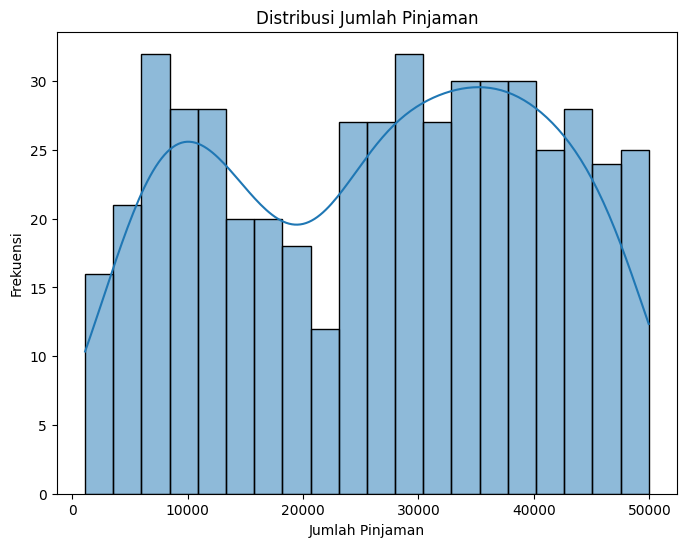

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['Loan_Amount'], bins=20, kde=True)  # Replace 'LoanAmount' with the correct column name
plt.title('Distribusi Jumlah Pinjaman')
plt.xlabel('Jumlah Pinjaman')
plt.ylabel('Frekuensi')
plt.show()

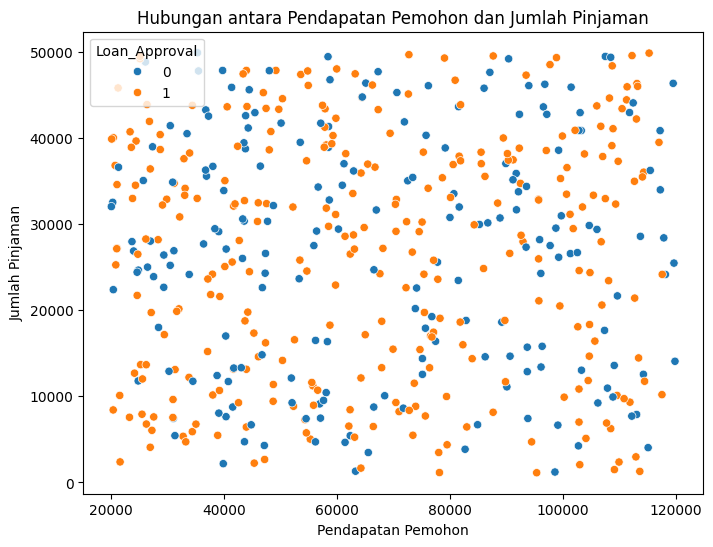

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Loan_Amount', data=data, hue='Loan_Approval')  # Membuat scatter plot dengan warna berdasarkan status pinjaman
plt.title('Hubungan antara Pendapatan Pemohon dan Jumlah Pinjaman')
plt.xlabel('Pendapatan Pemohon')
plt.ylabel('Jumlah Pinjaman')
plt.show()

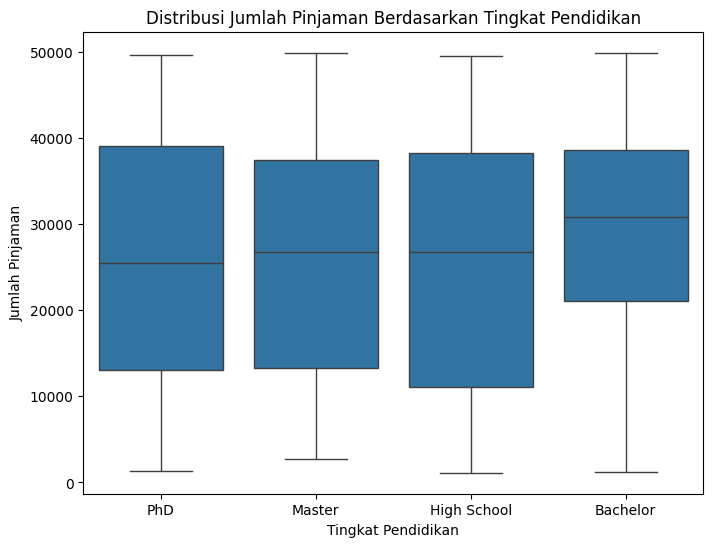

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education_Level', y='Loan_Amount', data=data)  # Membuat box plot berdasarkan tingkat pendidikan
plt.title('Distribusi Jumlah Pinjaman Berdasarkan Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Pinjaman')
plt.show()

**2. Pemrosesan Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Buat objek LabelEncoder
label_encoder = LabelEncoder()

# Lakukan Label Encoding pada kolom 'Education'
data['Education_Encoded'] = label_encoder.fit_transform(data['Education_Level'])
data

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval,Education_Encoded
0,56,24000,PhD,333,26892,Personal,0,3
1,46,90588,Master,316,26619,Home,1,2
2,32,113610,PhD,452,1281,Personal,1,3
3,60,117856,High School,677,28420,Personal,0,1
4,25,58304,PhD,641,16360,Car,0,3
...,...,...,...,...,...,...,...,...
495,37,108236,High School,455,44668,Education,1,1
496,41,117579,Bachelor,666,24177,Car,1,0
497,29,26469,PhD,550,25022,Medical,0,3
498,52,50105,High School,633,41761,Medical,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom numerik yang akan diskalakan
numerical_cols = ['Income', 'Loan_Amount', 'Loan_Approval',  'Education_Encoded', 'Credit_Score']

# Buat objek StandardScaler
scaler = StandardScaler()

# Lakukan scaling pada kolom numerik
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval,Education_Encoded
0,56,-1.496205,PhD,-1.500286,0.026245,Personal,-1.214598,1.383498
1,46,0.809486,Master,-1.606833,0.006629,Home,0.823318,0.475691
2,32,1.606651,PhD,-0.754461,-1.813972,Personal,0.823318,1.383498
3,60,1.753674,High School,0.655712,0.136035,Personal,-1.214598,-0.432116
4,25,-0.308387,PhD,0.430084,-0.730507,Car,-1.214598,1.383498
...,...,...,...,...,...,...,...,...
495,37,1.420569,High School,-0.735659,1.303496,Education,0.823318,-0.432116
496,41,1.744082,Bachelor,0.586770,-0.168835,Car,0.823318,-1.339924
497,29,-1.410713,PhD,-0.140253,-0.108120,Medical,-1.214598,1.383498
498,52,-0.592287,High School,0.379945,1.094621,Medical,-1.214598,-0.432116


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data[['Income', 'Loan_Amount',  'Education_Encoded', 'Credit_Score']]  # Features
y = data['Loan_Approval']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # random_state for reproducibility

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 4)
X_test shape: (100, 4)
y_train shape: (400,)
y_test shape: (100,)


**3. Pemilihan Training dan Model**

**Logistic Regression**

Alasan Pemilihan:

- Sederhana dan mudah diinterpretasi: Logistic Regression adalah algoritma yang relatif sederhana dan mudah dipahami. Hasilnya dapat diinterpretasi dengan mudah, seperti melihat odds ratio untuk setiap fitur.
- Cocok untuk klasifikasi biner: Karena prediksi persetujuan pinjaman adalah masalah klasifikasi biner (ya/tidak), Logistic Regression sangat cocok.
- Efisien untuk dataset yang relatif kecil: Logistic Regression dapat bekerja dengan baik pada dataset dengan ukuran yang tidak terlalu besar.

**Random Forest**

Alasan Pemilihan:

- Performa yang tinggi: Random Forest dikenal memiliki performa yang tinggi dan akurasi yang baik dalam banyak kasus.
- Robust terhadap overfitting: Karena menggunakan ensemble dari decision tree, Random Forest cenderung lebih robust terhadap overfitting dibandingkan dengan decision tree tunggal.
- Mampu menangani fitur kategorikal dan numerik: Random Forest dapat menangani berbagai jenis fitur tanpa perlu preprocessing yang rumit.
- Dapat mengidentifikasi fitur penting: Random Forest dapat memberikan informasi tentang fitur-fitur yang paling penting dalam prediksi.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Logistic Regression
logreg_model = LogisticRegression(random_state=42)  # random_state untuk reproduksibilitas

# Random Forest
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
# Assuming 'Loan_Approval' is your target variable
# Remove 'Loan_Approval' from numerical_cols
numerical_cols = ['Income', 'Loan_Amount', 'Education_Encoded', 'Credit_Score']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the scaler on the selected numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Define features (X) and target (y)
X = data[['Income', 'Loan_Amount', 'Education_Encoded', 'Credit_Score']]
y = data['Loan_Approval']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the target variable to discrete classes if necessary
# (If 'Loan_Approval' is not already 0 or 1)
threshold = 0  # Adjust this threshold based on your data
y_train = (y_train > threshold).astype(int)
y_test = (y_test > threshold).astype(int)

# Initialize the models
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Fit the models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

# Random Forest
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.63      1.00      0.77        63

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100

[[ 0 37]
 [ 0 63]]
Random Forest Accuracy: 0.52
              precision    recall  f1-score   support

           0       0.33      0.30      0.31        37
           1       0.61      0.65      0.63        63

    accuracy                           0.52       100
   macro avg       0.47      0.47      0.47       100
weighted avg       0.51      0.52      0.51       100

[[11 26]
 [22 41]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Random Forest Accuracy:", accuracy_rf)

Logistic Regression Accuracy: 0.63
Random Forest Accuracy: 0.52


In [ ]:
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.63      1.00      0.77        63

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.30      0.31        37
           1       0.61      0.65      0.63        63

    accuracy                           0.52       100
   macro avg       0.47      0.47      0.47       100
weighted avg       0.51      0.52      0.51       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**4. Evaluasi Model**

In [ ]:
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Logistic Regression Confusion Matrix:
 [[ 0 37]
 [ 0 63]]
Random Forest Confusion Matrix:
 [[11 26]
 [22 41]]


Logistic Regression akurasinya 63% dengan sonfusion matrix [[0 37] [0 63]]

**5. Tuning Model dengan Grid Search atau Random Search **

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Jenis regularisasi
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parameter regularisasi terbalik
    'solver': ['liblinear', 'saga'],  # Algoritma yang digunakan untuk optimasi
}

In [ ]:
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),  # Model dasar
    param_grid=param_grid,  # Parameter grid
    scoring='accuracy',  # Metrik evaluasi
    cv=5,  # Jumlah lipatan untuk cross-validation
    n_jobs=-1,  # Gunakan semua core CPU
)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
best_logreg_model = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_best_logreg = best_logreg_model.predict(X_test)
accuracy_best_logreg = accuracy_score(y_test, y_pred_best_logreg)
print("Best Logistic Regression Accuracy:", accuracy_best_logreg)
print(classification_report(y_test, y_pred_best_logreg))
print(confusion_matrix(y_test, y_pred_best_logreg))

Best Logistic Regression Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.63      1.00      0.77        63

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100

[[ 0 37]
 [ 0 63]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Tentukan parameter yang akan di-tuning dan nilainya
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Latih model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Dapatkan model terbaik
best_rf_model = grid_search.best_estimator_

# Evaluasi model terbaik
y_pred_best_rf = best_rf_model.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Best Random Forest Accuracy:", accuracy_best_rf)

Best Random Forest Accuracy: 0.57


In [ ]:
print("Best Hyperparameters for Random Forest:", grid_search.best_params_)

Best Hyperparameters for Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


**6. Perbandingan Performa Sebelum dan Sesudah Tuning **

In [ ]:
# Evaluasi model sebelum tuning
model_before = logreg_model  # or rf_model, depending on which model you want to compare
y_pred_before = model_before.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)
report_before = classification_report(y_test, y_pred_before)

# Evaluasi model sesudah tuning
model_after = best_logreg_model # or best_rf_model, depending on which model you want to compare
y_pred_after = model_after.predict(X_test)
accuracy_after = accuracy_score(y_test, y_pred_after)
report_after = classification_report(y_test, y_pred_after)

# Tampilkan perbandingan
print("Accuracy Before Tuning:", accuracy_before)
print("Accuracy After Tuning:", accuracy_after)
print("\nClassification Report Before Tuning:\n", report_before)
print("\nClassification Report After Tuning:\n", report_after)

Accuracy Before Tuning: 0.63
Accuracy After Tuning: 0.63

Classification Report Before Tuning:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.63      1.00      0.77        63

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100


Classification Report After Tuning:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.63      1.00      0.77        63

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Tuning tidak berhasil meningkatkan akurasi model pada logistic regression, akan tetapi tuning berhasil meningkatkan akurasi model pada Random Forest dari yang awalnya 0,52 menjadi 0,57.